<a href="https://colab.research.google.com/github/Win10kc/handwritten-character-recognition/blob/main/lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import kagglehub
from scipy.ndimage import rotate

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Download MNIST dataset from Kaggle
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")
print("Path to dataset files:", path)

# Load the dataset
train_path = os.path.join(path, "mnist_train.csv")
test_path = os.path.join(path, "mnist_test.csv")

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Extract labels and pixel values
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# MNIST has 10 classes (digits 0-9)
num_classes = 10

# Reshape and preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

# Preprocessing: Rotate, flip, normalize
def preprocess_images(images):
    images_rotated = np.array([rotate(img, angle=90, reshape=False) for img in images])
    images_flipped = images_rotated[:, :, ::-1, :]
    images_normalized = images_flipped / 255.0
    return images_normalized

X_train = preprocess_images(X_train)
X_test = preprocess_images(X_test)

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define LeNet-5 model
def create_lenet5():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Conv2D(48, (5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(84, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create and compile LeNet-5
lenet5 = create_lenet5()
lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lenet5.summary()

# Callback to save the best model
checkpoint = ModelCheckpoint('best_lenet5.h5', monitor='val_loss', save_best_only=True, mode='min')

# Measure training time
start_time = time.time()

# Train the model
history = lenet5.fit(X_train, y_train, batch_size=128, epochs=10,
                     validation_data=(X_test, y_test), callbacks=[checkpoint])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
hours, rem = divmod(training_time, 3600)
minutes, seconds = divmod(rem, 60)
print(f"\nLeNet-5 Training Time: {int(hours)} hours {int(minutes)} minutes {int(seconds)} seconds")

# Evaluate model
y_pred = lenet5.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

print("\nLeNet-5 Evaluation Metrics:")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")

# Plot confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LeNet-5 Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('lenet5_confusion_matrix.png')
plt.close()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LeNet-5 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LeNet-5 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('lenet5_training_history.png')
plt.close()

Path to dataset files: /kaggle/input/mnist-in-csv


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 48)     │        38,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       307,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,174 (1.41 MB)

 Trainable params: 369,174 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8696 - loss: 0.4350

469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8698 - loss: 0.4344 - val_accuracy: 0.9819 - val_loss: 0.0534
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9831 - loss: 0.0529 - val_accuracy: 0.9823 - val_loss: 0.0554
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9886 - loss: 0.0369

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0369 - val_accuracy: 0.9863 - val_loss: 0.0408
Epoch 4/10
460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0268

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9889 - val_loss: 0.0346
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9939 - loss: 0.0201 - val_accuracy: 0.9892 - val_loss: 0.0353
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9954 - loss: 0.0154 - val_accuracy: 0.9892 - val_loss: 0.0361
Epoch 7/10
456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9957 - loss: 0.0131

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9957 - loss: 0.0131 - val_accuracy: 0.9917 - val_loss: 0.0297
Epoch 8/10
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9965 - loss: 0.0114

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9965 - loss: 0.0114 - val_accuracy: 0.9930 - val_loss: 0.0239
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9920 - val_loss: 0.0316
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9972 - loss: 0.0093 - val_accuracy: 0.9917 - val_loss: 0.0274

LeNet-5 Training Time: 0 hours 0 minutes 31 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

LeNet-5 Evaluation Metrics:
Accuracy: 0.99170
Precision: 0.99172
Recall: 0.99170
F1-score: 0.99170


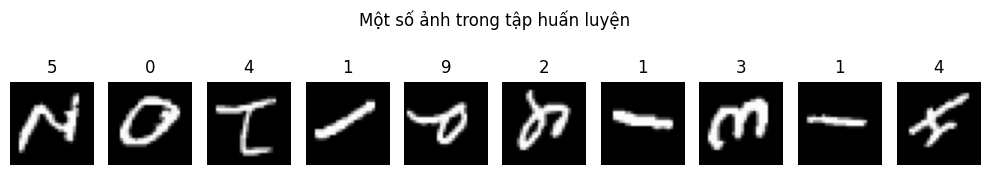

In [ ]:
# Hiển thị 10 ảnh đầu tiên trong tập huấn luyện sau khi tiền xử lý
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(np.argmax(y_train[i]))
    plt.axis('off')
plt.suptitle("Một số ảnh trong tập huấn luyện")
plt.tight_layout()
plt.savefig("sample_training_images.png")
plt.show()


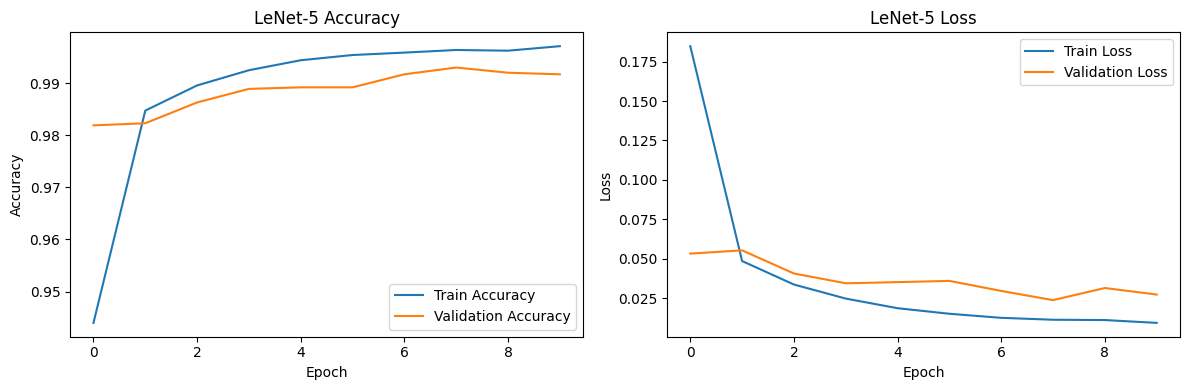

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LeNet-5 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LeNet-5 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('lenet5_training_history.png')
plt.show()  # Thêm dòng này nếu muốn hiện biểu đồ luôn
